<a href="https://colab.research.google.com/github/JosephJonathanFernandes/Sem7-AI-ML-Honours-Lab-Codes/blob/main/NNDL_expt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training AND Gate
AND Gate Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Raw probabilities:
[0.06625151 0.26141515 0.20198119 0.5387891 ]
Predictions:
[0 0 0 1]
Expected:
[0 0 0 1]
AND Gate Accuracy (manual): 100.00%

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


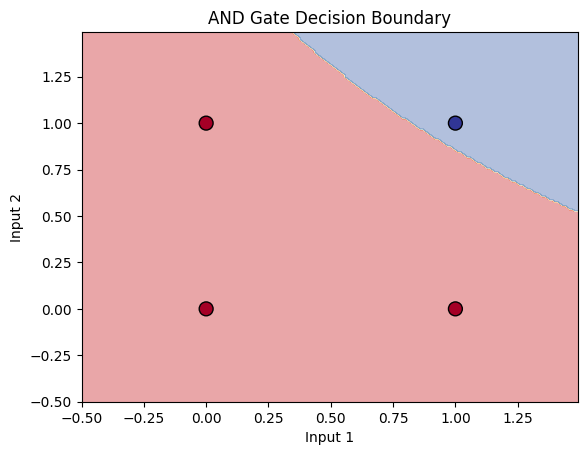


Training OR Gate
OR Gate Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Raw probabilities:
[0.17308024 0.8994615  0.93408304 0.98733705]
Predictions:
[0 1 1 1]
Expected:
[0 1 1 1]
OR Gate Accuracy (manual): 100.00%

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


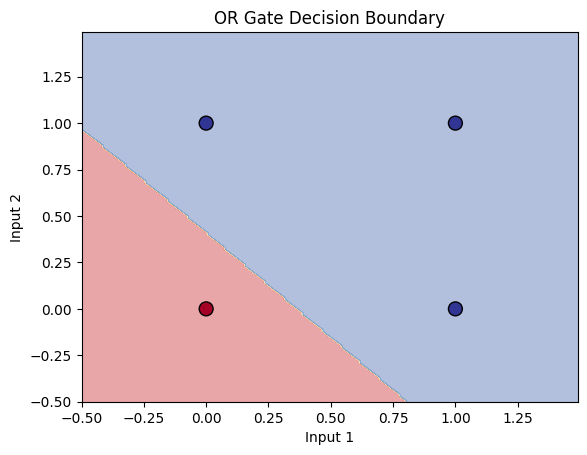


Training NOT Gate
NOT Gate Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Inputs:
[[0]
 [1]]
Raw probabilities:
[0.81420004 0.12779926]
Predictions:
[1 0]
Expected:
[1 0]
NOT Gate Accuracy (manual): 100.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


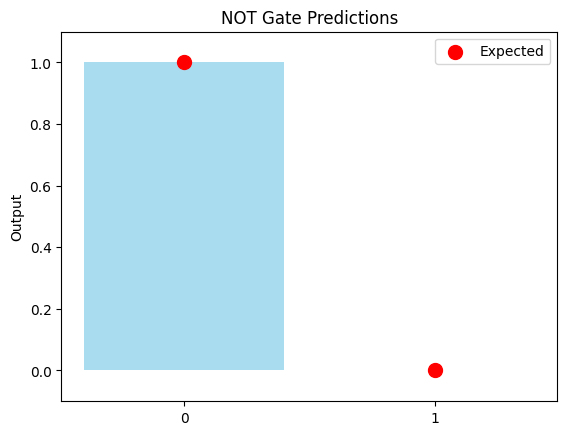


Training XOR Gate
XOR Gate Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Raw probabilities:
[0.475474  0.5022355 0.5330364 0.5173622]
Predictions:
[0 1 1 1]
Expected:
[0 1 1 0]
XOR Gate Accuracy (manual): 75.00%

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


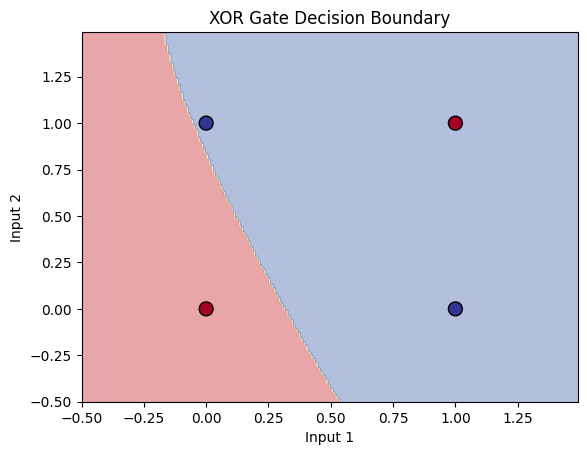

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

# Make runs deterministic for debugging (reproducible weights/outputs)
np.random.seed(0)
tf.random.set_seed(0)

# Function to build, train, and return a simple ANN for a logic gate
def train_gate(X, y, gate_name):
    print(f"\nTraining {gate_name} Gate")

    # Define the model
    model = Sequential()
    model.add(Input(shape=(X.shape[1],))) # Use Input layer
    model.add(Dense(4, activation='sigmoid'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer


    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=2000, verbose=0)

    # Evaluate
    _, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{gate_name} Gate Accuracy: {accuracy*100:.2f}%")

    # Predictions
    # Predictions and raw probabilities
    probs = model.predict(X)
    predictions = (probs > 0.5).astype("int32")
    accuracy = np.mean(predictions == y) * 100.0
    print(f"Inputs:\n{X}\nRaw probabilities:\n{probs.flatten()}\nPredictions:\n{predictions.flatten()}\nExpected:\n{y.flatten()}\n{gate_name} Gate Accuracy (manual): {accuracy:.2f}%\n")

    return model

# Function to visualize 2-input logic gates or single-input NOT gate
def plot_gate(X, y, model, gate_name):
    if X.shape[1] == 2:  # Only 2-input gates
        # Create a grid of points
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict on grid
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = (model.predict(grid_points) > 0.5).astype(int)
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:,0], X[:,1], c=y[:,0], s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f"{gate_name} Gate Decision Boundary")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()
    else:  # Single input gates like NOT
        predictions = (model.predict(X) > 0.5).astype(int)
        plt.bar([0,1], predictions[:,0], color='skyblue', alpha=0.7)
        plt.scatter([0,1], y[:,0], color='red', s=100, label='Expected')
        plt.xticks([0,1])
        plt.ylim(-0.1,1.1)
        plt.title(f"{gate_name} Gate Predictions")
        plt.ylabel("Output")
        plt.legend()
        plt.show()


# ------------------- TRAIN AND VISUALIZE ALL LOGIC GATES -------------------

# AND gate
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([[0],[0],[0],[1]])
model_and = train_gate(X_and, y_and, "AND")
plot_gate(X_and, y_and, model_and, "AND")

# OR gate
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([[0],[1],[1],[1]])
model_or = train_gate(X_or, y_or, "OR")
plot_gate(X_or, y_or, model_or, "OR")

# NOT gate (single input)
X_not = np.array([[0],[1]])
y_not = np.array([[1],[0]])
model_not = train_gate(X_not, y_not, "NOT")
plot_gate(X_not, y_not, model_not, "NOT")

# XOR gate (needs hidden layer to learn)
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([[0],[1],[1],[0]])
model_xor = train_gate(X_xor, y_xor, "XOR")
plot_gate(X_xor, y_xor, model_xor, "XOR")

AND Gate:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[0. 0. 0. 1.]
Expected:
[0 0 0 1]



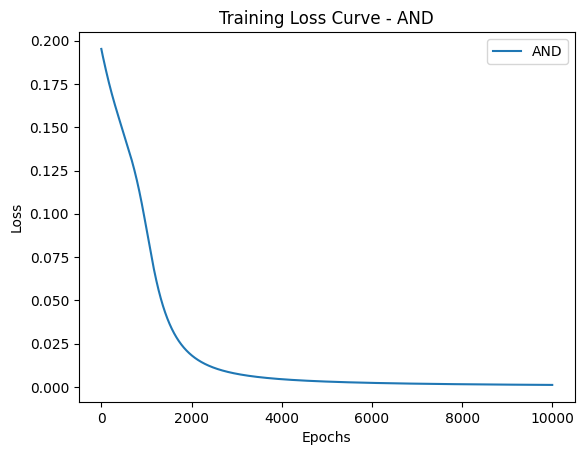

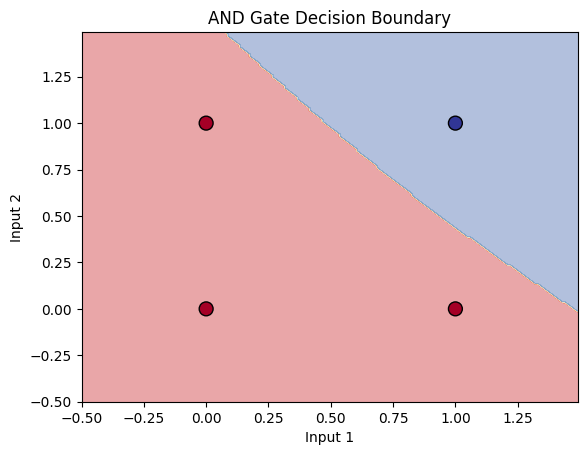

OR Gate:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[0. 1. 1. 1.]
Expected:
[0 1 1 1]



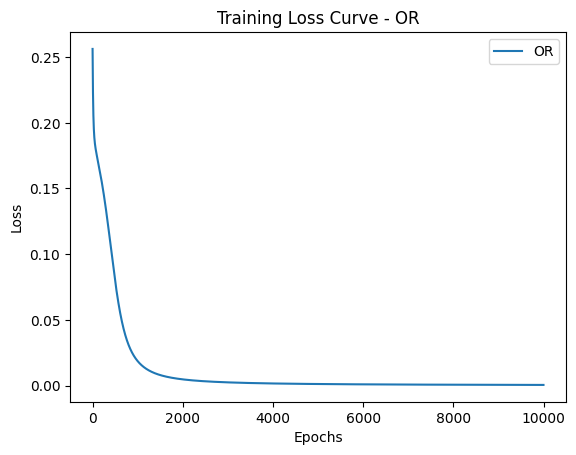

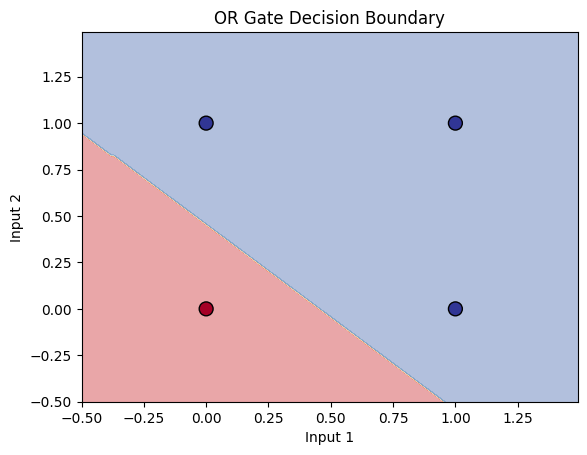

XOR Gate:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[0. 1. 1. 0.]
Expected:
[0 1 1 0]



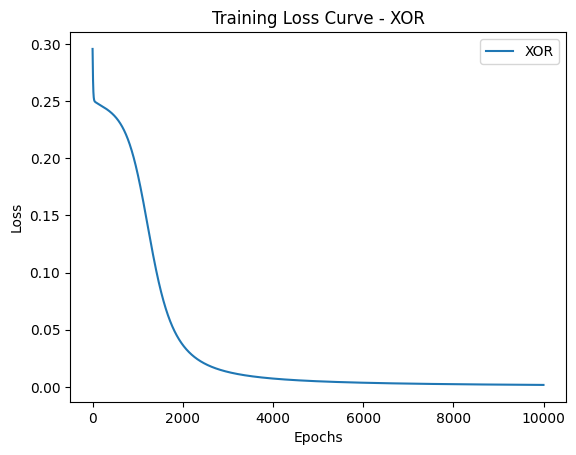

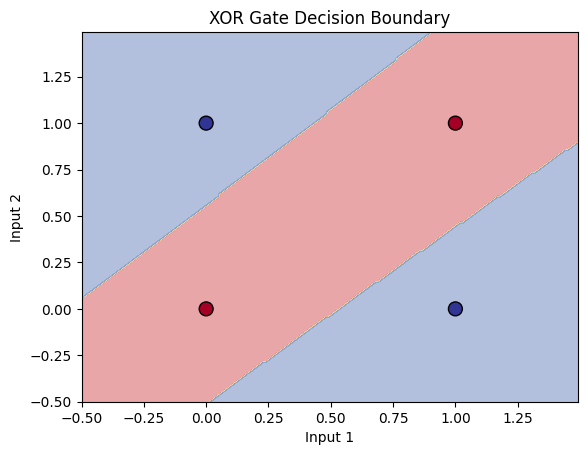

NOT Gate:
Inputs:
[[0]
 [1]]
Predictions:
[1. 0.]
Expected:
[1 0]



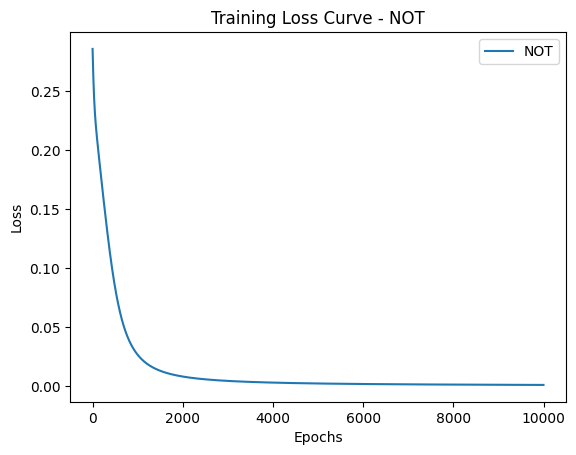

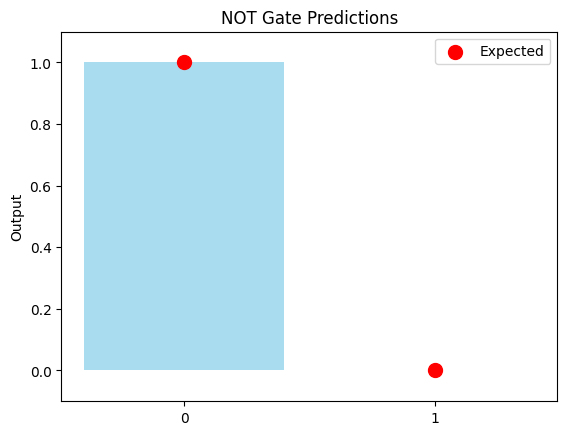

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation + derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Multi-layer perceptron class
class MLP:
    def __init__(self, input_size, hidden_size=2, lr=0.1, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        # Initialize weights randomly
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))
        self.loss_history = []

    def train(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        for _ in range(self.epochs):
            # Forward pass
            z1 = np.dot(X, self.W1) + self.b1
            a1 = sigmoid(z1)
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = sigmoid(z2)

            # Compute loss (mean squared error)
            loss = np.mean((y - a2) ** 2)
            self.loss_history.append(loss)

            # Backpropagation
            error = y - a2
            d_a2 = error * sigmoid_derivative(a2)

            error_hidden = d_a2.dot(self.W2.T)
            d_a1 = error_hidden * sigmoid_derivative(a1)

            # Update weights
            self.W2 += a1.T.dot(d_a2) * self.lr
            self.b2 += np.sum(d_a2, axis=0, keepdims=True) * self.lr
            self.W1 += X.T.dot(d_a1) * self.lr
            self.b1 += np.sum(d_a1, axis=0, keepdims=True) * self.lr

        # After training
        predictions = self.predict(X)
        print(f"{self.gate_name} Gate:")
        print(f"Inputs:\n{X}\nPredictions:\n{predictions.flatten()}\nExpected:\n{y.flatten()}\n")

    def predict(self, X):
        X = np.array(X)
        z1 = np.dot(X, self.W1) + self.b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = sigmoid(z2)
        return np.round(a2)

    def plot_loss(self):
        plt.plot(self.loss_history, label=self.gate_name)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Training Loss Curve - {self.gate_name}")
        plt.legend()
        plt.show()

    def set_gate_name(self, name):
        self.gate_name = name

    # Visualization for 2-input gates or bar plot for NOT
    def plot_gate(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1,1)

        if X.shape[1] == 2:  # 2-input gates
            x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
            y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                 np.arange(y_min, y_max, 0.01))
            grid_points = np.c_[xx.ravel(), yy.ravel()]
            Z = self.predict(grid_points).reshape(xx.shape)

            plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
            plt.scatter(X[:,0], X[:,1], c=y[:,0], s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
            plt.title(f"{self.gate_name} Gate Decision Boundary")
            plt.xlabel("Input 1")
            plt.ylabel("Input 2")
            plt.show()
        else:  # NOT gate (single input)
            predictions = self.predict(X)
            plt.bar([0,1], predictions.flatten(), color='skyblue', alpha=0.7)
            plt.scatter([0,1], y.flatten(), color='red', s=100, label='Expected')
            plt.xticks([0,1])
            plt.ylim(-0.1,1.1)
            plt.title(f"{self.gate_name} Gate Predictions")
            plt.ylabel("Output")
            plt.legend()
            plt.show()


# ------------------- TRAIN AND VISUALIZE ALL LOGIC GATES -------------------

gates = {
    "AND": {"X": [[0,0],[0,1],[1,0],[1,1]], "y": [0,0,0,1]},
    "OR":  {"X": [[0,0],[0,1],[1,0],[1,1]], "y": [0,1,1,1]},
    "XOR": {"X": [[0,0],[0,1],[1,0],[1,1]], "y": [0,1,1,0]},
    "NOT": {"X": [[0],[1]], "y": [1,0]}
}

for gate_name, data in gates.items():
    input_size = len(data["X"][0])
    hidden_size = 4 if gate_name == "XOR" else 2  # XOR needs more neurons
    mlp = MLP(input_size=input_size, hidden_size=hidden_size, epochs=10000, lr=0.1)
    mlp.set_gate_name(gate_name)
    mlp.train(data["X"], data["y"])
    mlp.plot_loss()
    mlp.plot_gate(data["X"], data["y"])





Training AND Gate
AND Gate Accuracy: 100.00%
Inputs:
[[0, 0], [0, 1], [1, 0], [1, 1]]
Predictions:
[[0]
 [0]
 [0]
 [1]]
Expected:
[[0], [0], [0], [1]]



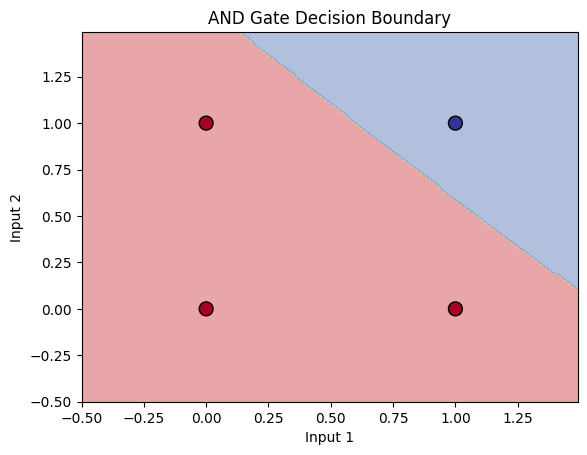


Training OR Gate
OR Gate Accuracy: 100.00%
Inputs:
[[0, 0], [0, 1], [1, 0], [1, 1]]
Predictions:
[[0]
 [1]
 [1]
 [1]]
Expected:
[[0], [1], [1], [1]]



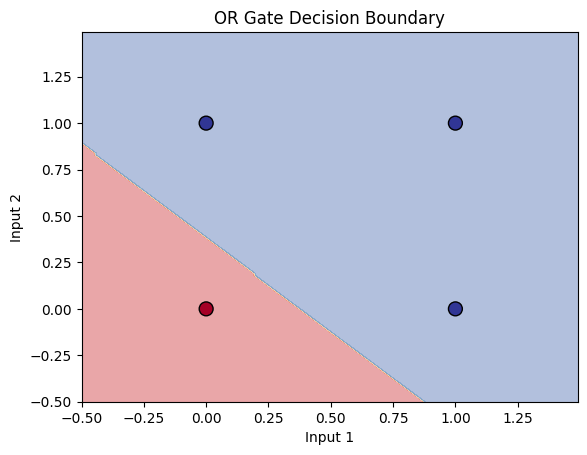


Training NOT Gate
NOT Gate Accuracy: 100.00%
Inputs:
[[0], [1]]
Predictions:
[[1]
 [0]]
Expected:
[[1], [0]]



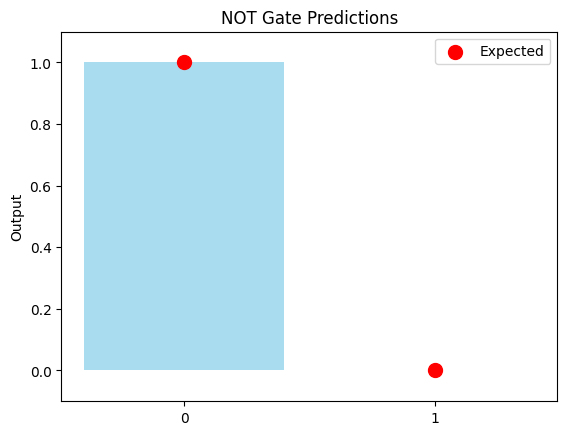


Training XOR Gate
XOR Gate Accuracy: 50.00%
Inputs:
[[0, 0], [0, 1], [1, 0], [1, 1]]
Predictions:
[[0]
 [0]
 [1]
 [1]]
Expected:
[[0], [1], [1], [0]]



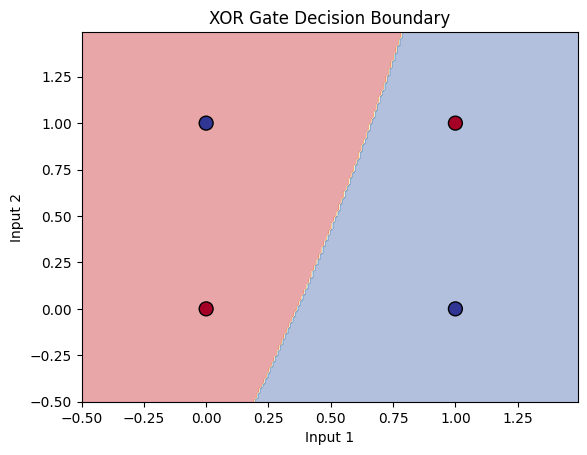

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ------------------- DEFINE NEURAL NETWORK -------------------
class LogicGateNN(nn.Module):
    def __init__(self, input_size, hidden_size=4):
        super(LogicGateNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# ------------------- TRAINING FUNCTION -------------------
def train_gate(X, y, gate_name, epochs=1000, lr=0.1):
    print(f"\nTraining {gate_name} Gate")

    # Convert to tensors
    X_train = torch.tensor(X, dtype=torch.float32)
    y_train = torch.tensor(y, dtype=torch.float32)

    # Model
    model = LogicGateNN(input_size=X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        predictions = (model(X_train) > 0.5).int()
        accuracy = (predictions == y_train.int()).float().mean()
        print(f"{gate_name} Gate Accuracy: {accuracy*100:.2f}%")
        print(f"Inputs:\n{X}\nPredictions:\n{predictions.numpy()}\nExpected:\n{y}\n")

    return model

# ------------------- VISUALIZATION FUNCTION -------------------
def plot_gate(X, y, model, gate_name):
    X = np.array(X)
    y = np.array(y)
    if X.shape[1] == 2:  # 2-input gates
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_tensor = torch.tensor(grid_points, dtype=torch.float32)
        with torch.no_grad():
            Z = (model(grid_tensor) > 0.5).int().numpy()
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:,0], X[:,1], c=y[:,0], s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f"{gate_name} Gate Decision Boundary")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()
    else:  # Single-input NOT gate
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            predictions = (model(X_tensor) > 0.5).int().numpy()
        plt.bar([0,1], predictions[:,0], color='skyblue', alpha=0.7)
        plt.scatter([0,1], y[:,0], color='red', s=100, label='Expected')
        plt.xticks([0,1])
        plt.ylim(-0.1, 1.1)
        plt.title(f"{gate_name} Gate Predictions")
        plt.ylabel("Output")
        plt.legend()
        plt.show()


# ------------------- TRAIN AND VISUALIZE ALL LOGIC GATES -------------------

# AND gate
X_and = [[0,0],[0,1],[1,0],[1,1]]
y_and = [[0],[0],[0],[1]]
model_and = train_gate(X_and, y_and, "AND")
plot_gate(X_and, y_and, model_and, "AND")

# OR gate
X_or = [[0,0],[0,1],[1,0],[1,1]]
y_or = [[0],[1],[1],[1]]
model_or = train_gate(X_or, y_or, "OR")
plot_gate(X_or, y_or, model_or, "OR")

# NOT gate (single input)
X_not = [[0],[1]]
y_not = [[1],[0]]
model_not = train_gate(X_not, y_not, "NOT")
plot_gate(X_not, y_not, model_not, "NOT")

# XOR gate (non-linear, requires hidden layer)
X_xor = [[0,0],[0,1],[1,0],[1,1]]
y_xor = [[0],[1],[1],[0]]
model_xor = train_gate(X_xor, y_xor, "XOR")
plot_gate(X_xor, y_xor, model_xor, "XOR")
